# Actividad 1

## Indicaciones

Suponga que está encargado de realizar un análisis de componentes principales de los datos proporcionados.

A partir de los datos presentados responda los siguientes cuestionamientos: 

- Mencione cuál es el objeto o individuo que se está analizando en el presente caso.

  <span style="color:blue">La agrupación por estado del porcentaje de la disponibilidad (y uso) de las tecnologías en los hogares.</span>

- Identifica las variables del estudio y, para cada una de ellas, mencionar el tipo de variables al que pertenece (cuantitativa o cualitativa) y la escala de medición empleada (categórica, ordinal, de razón, de intervalo).

  <span style="color:blue">Las variables son cuantitativas, con escala de razón.</span>

- ¿Los datos utilizados para el presente estudio son adecuados para realizar un ACP?

   <span style="color:blue">Sí, porque de la matriz de correlaciones (_abajo_) se obtiene que hay algunas correlaciones altas</span>

In [1]:
library(readxl)

mis_datos <- read_excel("datasets/Hogares_equipo.xlsx", sheet="Hogares_equipo")
mis_datos <- as.data.frame(mis_datos)
row.names(mis_datos)<-mis_datos[,1]
mis_datos[,1]<-NULL
# head(mis_datos, n=5)
matriz_corr <- cor(mis_datos)
matriz_corr

,Internet,Television,TV de paga,Telefonia,Radio,Automovil,Lavadora,Estufa de gas o electrica,Refrigerador,Horno de microondas,Aire acondicionado
Internet,1.0000000,0.4348576,0.6177193,0.7411369,0.1162590,0.7541892,0.6870090,0.5458694,0.7249157,0.6583618,0.5220521
Television,0.4348576,1.0000000,0.5261206,0.8255445,0.5420185,0.5516622,0.7276351,0.7612427,0.6599729,0.6603211,0.2183669
TV de paga,0.6177193,0.5261206,1.0000000,0.6158451,-0.1201431,0.4922361,0.5400585,0.3822995,0.5186236,0.3650210,0.5538163
Telefonia,0.7411369,0.8255445,0.6158451,1.0000000,0.4003166,0.7367703,0.7621542,0.8501717,0.8059083,0.7919328,0.4209484
Radio,0.1162590,0.5420185,-0.1201431,0.4003166,1.0000000,0.3897106,0.3404902,0.5101572,0.2620115,0.4896881,-0.3412197
Automovil,0.7541892,0.5516622,0.4922361,0.7367703,0.3897106,1.0000000,0.6929933,0.6221572,0.6919786,0.8351207,0.5030789
Lavadora,0.6870090,0.7276351,0.5400585,0.7621542,0.3404902,0.6929933,1.0000000,0.7477837,0.8770361,0.8587883,0.3733423
Estufa de gas o electrica,0.5458694,0.7612427,0.3822995,0.8501717,0.5101572,0.6221572,0.7477837,1.0000000,0.8095874,0.8044404,0.2418910
Refrigerador,0.7249157,0.6599729,0.5186236,0.8059083,0.2620115,0.6919786,0.8770361,0.8095874,1.0000000,0.8654461,0.4496627
Horno de microondas,0.6583618,0.6603211,0.3650210,0.7919328,0.4896881,0.8351207,0.8587883,0.8044404,0.8654461,1.0000000,0.3720221


In [2]:
suppressMessages(library("psych"))
indice_kmo<- KMO(mis_datos)$MSA
indice_kmo

[1] 0.8079663

<span style="color:blue">Con el criterio del KMO, se obtiene que el valor es .81, lo cual está en el
rango de bueno y se pueden obtener los CPs</span>

- Utilizando la matriz de correlación, determinar el número de componentes a ser considerados utilizando los siguientes métodos y justificar las respuestas:

  a) Del porcentaje de Variación Total Acumulada (al menos el 75%)

In [3]:
# Se obtiene la variación total acumulada
#pca_endutih <- prcomp(matriz_corr, center=TRUE) #Si se quiere usar el valor normalizado, scale = TRUE
#summary(pca_endutih)$importance

pca_endutih <- prcomp(mis_datos, scale=T) # Se recomienda usar scale = TRUE, para datos normalizados
summary(pca_endutih)$importance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,2.628627,1.32937,0.8300862,0.6979367,0.6367097,0.5299618,0.4049087,0.3389369,0.2916063,0.252616,0.1816593
Proportion of Variance,0.628150,0.16066,0.0626400,0.0442800,0.0368500,0.0255300,0.0149000,0.0104400,0.0077300,0.005800,0.0030000
Cumulative Proportion,0.628150,0.78881,0.8514500,0.8957300,0.9325900,0.9581200,0.9730200,0.9834700,0.9912000,0.997000,1.0000000


   <span style="color:blue">De lo anterior se obtiene que sólo los dos primeros componentes principales son necesarios para alcanzar una proporción del 85%, y que del CP3 en adelante no tienen tanta significancia.</span>

  b) El criterio de Kaiser

In [4]:
# Asignamos los eigenvalores a un objeto
eigens <- eigen(matriz_corr)
# Convertimos los eigenvectores a un dataframe
eigenvectores <- as.data.frame(eigens$vectors)
# Le ponemos el nombre de los eigenvalores a la columna
names(eigenvectores) <- eigens$values
# Filtramos los eigenvalores mayores a 1
eigenvectores[as.character(eigens$values[eigens$values > 1])]

6.90967900368248,1.76722509751115
-0.3044418,-0.23416880
-0.3067184,0.20447658
-0.2417977,-0.38430128
-0.3553789,0.02748262
-0.1557823,0.62629971
-0.3224170,-0.04169287
-0.3429478,0.02549473
-0.3275010,0.20988910
-0.3467032,-0.02946264
-0.3462346,0.12481897


<span style="color:blue">El criterio de Kaiser dice que se mantienen los eigenvectores con eigenvalor &gt; 1, lo cual refuerza la teoría de mantener los dos primeros CP</span>

  c) El método gráfico

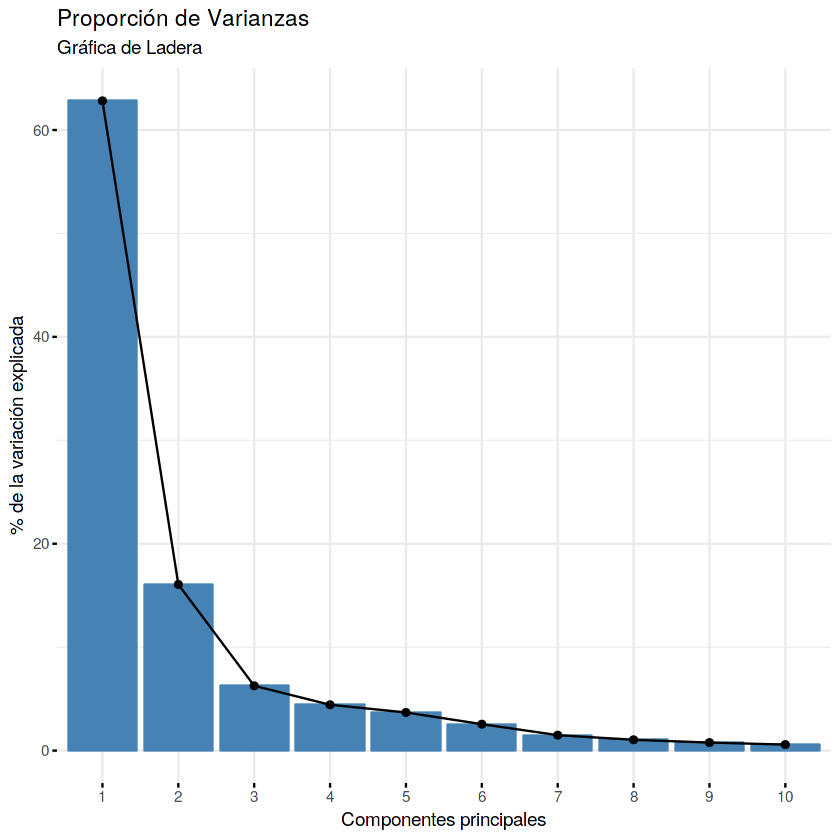

In [5]:
suppressMessages(library(factoextra))

# Para eigenvalores, choice="eigenvalue"
mi_ggplot <- fviz_eig(pca_endutih, choice="variance")

mi_ggplot + 
    labs(
        title = "Proporción de Varianzas"
        ,subtitle = "Gráfica de Ladera"
        ,x = "Componentes principales"
        ,y = "% de la variación explicada"
    )

<span style="color:blue">En la gráfica de la ladera se ve que el tercer CP explica menos del 10% y que los dos primeros CP explican $\approx83\%$ de la varianza total, por lo cual se puede omitir el CP3 </span>

- Seleccionar las dos primeras componentes, realizar la gráfica Bi-plot e interpretar los que observa en ella y mencionar cinco hallazgos relevantes.

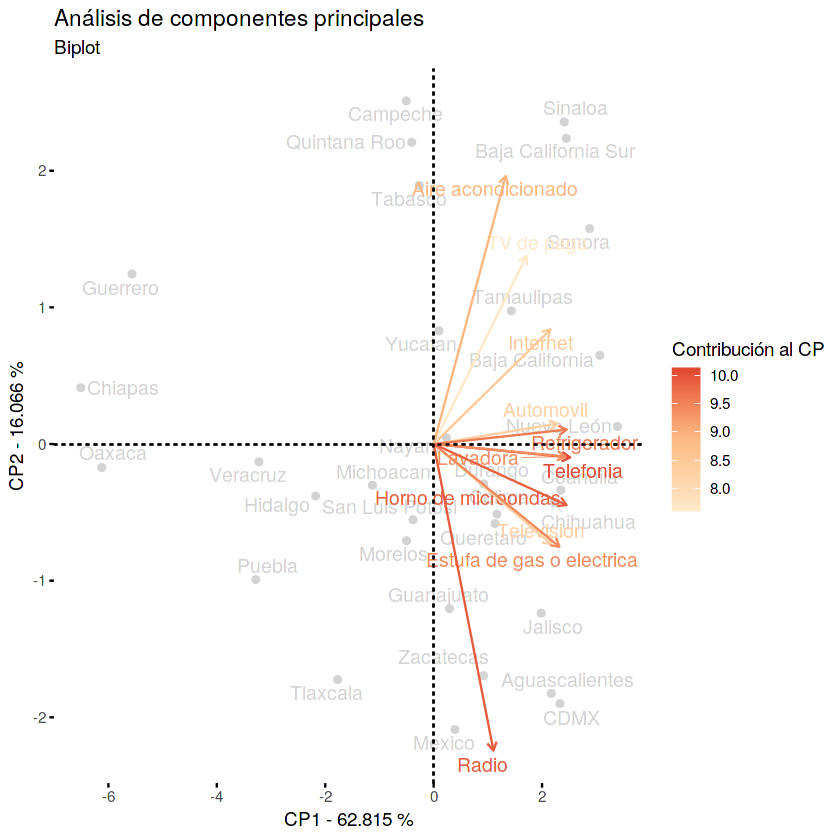

In [6]:
library(readxl)
suppressMessages(library(factoextra))

mis_datos <- read_excel("datasets/Hogares_equipo.xlsx", sheet="Hogares_equipo")
mis_datos <- as.data.frame(mis_datos)
row.names(mis_datos)<-mis_datos[,1]
mis_datos[,1]<-NULL

pca_endutih <- prcomp(
    mis_datos
    #,center=TRUE # xi-x_barra
    ,scale=TRUE # xi/(sqrt(sum(xi^2)))
    )

var_acumulada_cp <- summary(pca_endutih)$importance["Proportion of Variance",1:2]
var_acumulada_cp <- var_acumulada_cp*100

mi_biplot <- fviz_pca_biplot(
    pca_endutih
    ,axes = c(1, 2) # CP a graficar
    ,repel = TRUE # Para no encimar las etiquetas
    ,col.var = "contrib" # Color de la línea por contribución a CP
    ,col.ind = "#D3D3D3" # Color de los individuos
    ,gradient.cols = c('#FEE8C8','#FDBB84','#E34A33') # Gradiente de colores
    )

mi_biplot +    
    labs(
        title = "Análisis de componentes principales"
        ,subtitle = "Biplot"
        ,x = paste("CP1", "-", var_acumulada_cp[1], "%")
        ,y = paste("CP2", "-", var_acumulada_cp[2], "%")
        ,color="Contribución al CP"
    ) +
    theme(
        panel.grid.major = element_blank()
        ,panel.grid.minor = element_blank()
    )

Como personalmente me parece complicado leer las flechas, veo las correlaciones entre los datos y los CP

In [7]:
comp_princ <- pca_endutih$x[,1:2]
corr_varind_pc <- cor(mis_datos, comp_princ)
corr_varind_pc

,PC1,PC2
Internet,0.8002639,0.31129702
Television,0.8062482,-0.27182507
TV de paga,0.6355958,0.51087866
Telefonia,0.9341584,-0.03653457
Radio,0.4094937,-0.83258417
Automovil,0.8475139,0.05542525
Lavadora,0.9014817,-0.03389193
Estufa de gas o electrica,0.8608780,-0.27902031
Refrigerador,0.9113534,0.03916676
Horno de microondas,0.9101215,-0.16593061


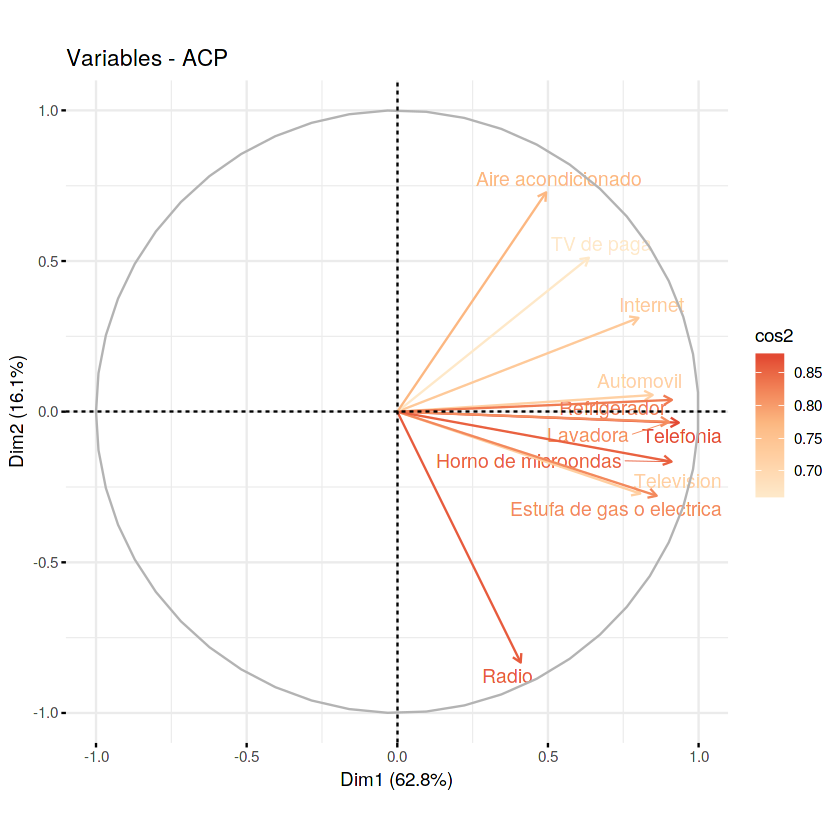

In [8]:
fviz_pca_var(
    pca_endutih
    ,col.var = "cos2",
    ,gradient.cols = c('#FEE8C8','#FDBB84','#E34A33') # Gradiente de colores
    ,repel = TRUE # Avoid text overlapping
    ) + ggtitle ("Variables - ACP")

<span style="color:blue">
    De los gráficos y la tabla anteriores se obtiene lo siguiente:
</span>


- <span style="color:blue">La gran mayoría de las variables tiene correlación positiva con los CP, a excepción de _aire acondicionado y tv de paga_</span>
- <span style="color:blue">Las variables refrigerador, internet, automóvil, telefonía, lavadora, microondas, y en menor medida aire acondicionado, estufa de gas y tv de paga, influyen de manera positiva en el CP1, lo cual nos dice que al incrementar el valor del CP1 aumentarán todas las variables.</span>
- <span style="color:blue">Por otro lado, radio tiene una correlación positiva alta con el CP2 mientras que la estufa de gas y horno de microondas tienen una correlación moderada con esta. También, TV de paga tiene correlación negativa con CP2. Por lo cual al aumentar el valor de CP2, aumentarán casi las variables a excepción de TV de paga y aire acondicionado.</span>
- <span style="color:blue">La variable que menos explica el CP1 es radio, y para CP2 Internet.</span>
- <span style="color:blue">Si seguimos la proyección de la variable _aire acondicionado_ vemos que Sinaloa tiene el mayor consumo en este rubro.</span>
- <span style="color:blue">Mientras mayor consumo en internet, mayor consumo en las demás variables.</span>

6 Responder a las siguientes preguntas:

  - A partir del análisis efectuado y considerando la hipótesis de que un hogar con mayores ingresos contará con la mayoría de los bienes y servicios enlistados, ¿se comprueba que Nuevo León, CDMX y Sonora son las entidades en donde los hogares cuentan con ingresos mayores y que Chiapas, Guerrero y Oaxaca las que menos?

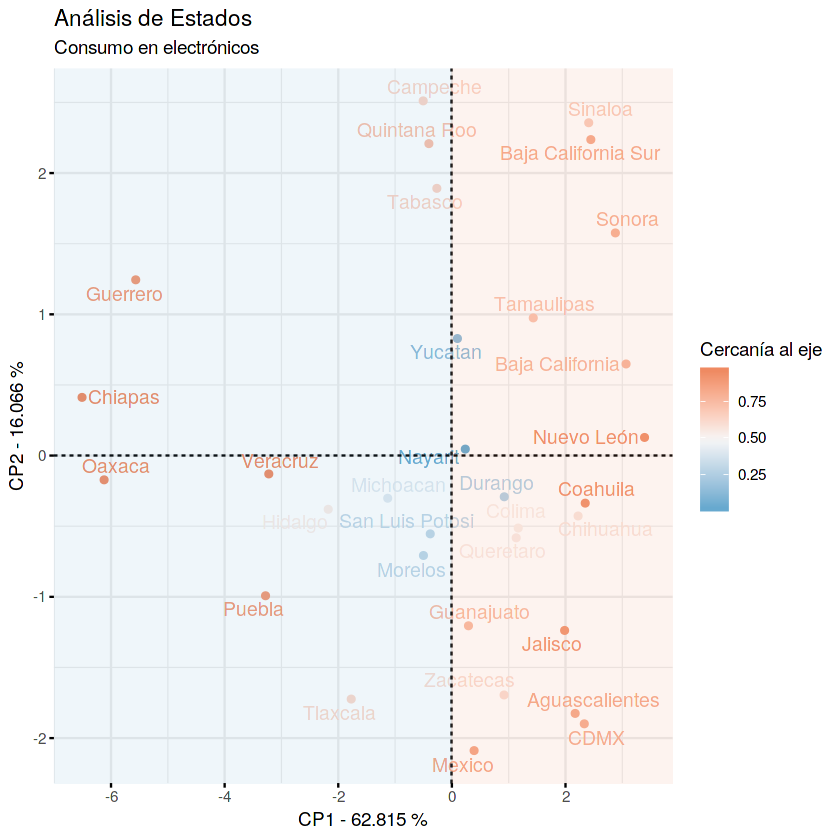

In [14]:
library(readxl)
suppressMessages(library(factoextra))

mis_datos <- read_excel("datasets/Hogares_equipo.xlsx", sheet="Hogares_equipo")
mis_datos <- as.data.frame(mis_datos)
row.names(mis_datos)<-mis_datos[,1]
mis_datos[,1]<-NULL

pca_endutih <- prcomp(mis_datos, scale=TRUE)

var_acumulada_cp <- summary(pca_endutih)$importance["Proportion of Variance",1:2]
var_acumulada_cp <- var_acumulada_cp*100

mi_indplot <- fviz_pca_ind(
    pca_endutih
    ,col.ind = "cos2" # Color por la calidad de la representación
    ,gradient.cols = c('#67A9CF','#F7F7F7','#EF8A62')
    ,repel = TRUE    
    )

mi_indplot +
    labs(
        title = "Análisis de Estados"
        ,subtitle = "Consumo en electrónicos"
        ,x = paste("CP1", "-", var_acumulada_cp[1], "%")
        ,y = paste("CP2", "-", var_acumulada_cp[2], "%")
        ,color="Cercanía al eje"
    ) +
    #theme(
    #    panel.grid.major = element_blank()
    #    ,panel.grid.minor = element_blank()
    #) +
    annotate(
        "rect",
        xmin = Inf , xmax = 0
        ,ymin = Inf, ymax = -Inf
        ,fill= '#EF8A62'
        ,alpha=I(0.1)
    )+
    annotate(
        "rect",
        xmin = -Inf , xmax = 0
        ,ymin = Inf, ymax = -Inf
        ,fill= '#67A9CF'
        ,alpha=I(0.1)
    )

<span style="color:blue">Se comprueba que las entidades con menores ingresos son Chiapas, Guerrero y Oaxaca porque están en los cuadrantes opuestos de la disponibilidad de electrodomésticos. Nuevo León, Baja California y Sonora en el caso de las entidades que más, porque son los valores más extremos del CP1, que explica la mayoría de las variables. En el caso de la CDMX, parece ser que no todos los habitantes tienen los electrodomésticos de la encuesta y usan mucho la radio.</span>

  - Siguiendo la misma hipótesis sobre los ingresos del inciso anterior, ¿Cuál es el Estado que cuenta con los hogares de mayores ingresos y cuál es el Estado que tiene los hogares con ingresos más bajo?. 

<span style="color:blue">El estado con menores ingresos es Chiapas, porque es el valor más opuesto al cuadrante de los CP positivos que explican los electrodomésticos. Sonora es el estado con mayor ingreso ya que el punto que lo representa es el más alejado en direccion de los positivos del eje x</span>

# Usando PCA para agrupar datos

PCA también puede ayudar a visualizar grupos de datos:

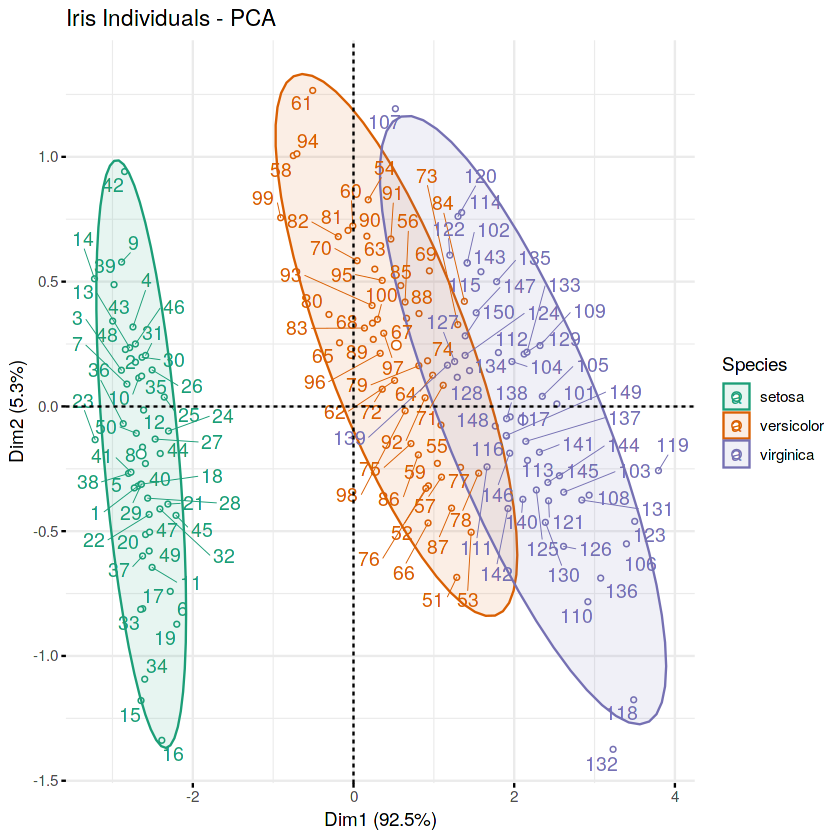

In [10]:
library(factoextra)
data("iris")

# Como Iris tiene el campo "Species" que es CHAR, se omite en el PCA.
iris_pca <- prcomp(iris[,-5])

# Se forman los grupos.
groups <- as.factor(iris$Species)

fviz_pca_ind(iris_pca
    ,col.ind = groups # Colorear por especies.
    ,palette = c('#1b9e77','#d95f02','#7570b3') # Paleta de los elementos.
    ,addEllipses = TRUE # Elipses de concentración.
    ,repel = TRUE # Evitar traslape de etiquetas.
    ,pointshape = 21
    ,pointsize = 1
    ,title = "Iris Individuals - PCA" # Título del gráfico.
    ,legend.title = "Species" # Título de la leyenda.
    # ,ellipse.level=0.95 # Intervalo de confianza.
    # ,ellipse.type = "confidence", # Usar elipse basado en el Int. de Conf.
)

In [11]:
pryr::object_size(mi_indplot)

558 kB